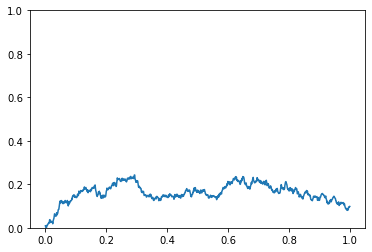

In [6]:
# IKNM Model 1

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

time = np.arange(0, 1, 0.001) 
D = 0.015
k = 0.015 # a constant
dt = 0.001

age = np.random.rand(1)
z0 = 0
v0 = 0
if age <= 0.4:
    z0 = z0 + 1-1.0/0.4*age
    v0 = -1/0.4
elif (0.4 < age <= 0.73):
    z0 = 0
    v0 = 0
elif (0.73 < age <= 0.89):
    z0 = z0 + 1.0/(0.16)*(age-0.73)
    v0 = 1/0.16
else:
    z0 = 1
    v0 = 0
    
zt = 0
final_zt = []
for t in range(len(time)):
    zt = zt + k*(z0 - zt)*dt + np.sqrt(2*D*dt)*np.random.randn(1)
    final_zt.append(zt)

plt.plot(time, final_zt)
plt.ylim(0,1)
plt.show()

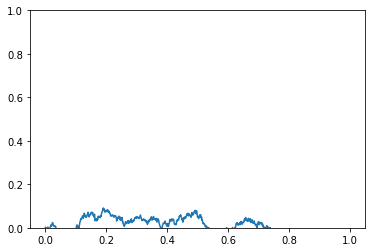

In [8]:
# IKNM - model 2
# Adding noise to model with velocity =  graph slope

zt = 0 # nuclei positions over all timesteps
D = 0.015
timend=300 # length of simulation
dt = 0.001
final_zt = []

time = np.arange(0, 1, 0.001) 


for t in time:
    zt = zt + v0*dt + np.sqrt(2*D*dt)*np.random.randn(1) # noise between 0 and 1
    final_zt.append(zt)
    
plt.plot(time, final_zt)  
plt.ylim(0,1)
plt.show()

[-1.863326586039339e-05, -2.3656741674413042e-05, -2.9956483035219976e-05, -3.78351764162077e-05, -4.7661620668085276e-05, -5.988374959098058e-05, -7.504388431968255e-05, -9.379652210599581e-05, -0.00011692899397451694, -0.00014538534817362534, -0.00018029383826828044, -0.00022299841284380295, -0.00027509461660921007, -0.00033847031847758984, -0.0004153516790053926, -0.0005083547552193552, -0.0006205431129745444, -0.0007554917730230802, -0.0009173577542545473, -0.0011109573933482805, -0.0013418505116100544, -0.0016164313644013149, -0.0019420261438627762, -0.0023269966094743, -0.0027808491917458104, -0.0033143486510064536, -0.003939635075671326, -0.004670342673334749, -0.005521718445568099, -0.006510738446759749, -0.007656218913640142, -0.008978919121902683, -0.010501632388005075, -0.01224926119817726, -0.01424887202518924, -0.01652972500079137, -0.019123273264019126, -0.022063126520491756, -0.0253849731445598, -0.0291264550548121, -0.033326989614727104, -0.038027532974804545, -0.043270

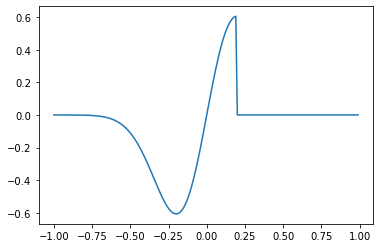

In [9]:
# - Piecewise forcing function

import numpy as np
import math
delta_z = np.random.randn(1) # random number between -1 and 1
s=0.2

def forcing_function(delta_z, s):
    if delta_z < s:
        print((math.exp(-(delta_z**2)/2*s**2))*delta_z/s)
        return(math.exp(-(delta_z**2)/2*s**2)*delta_z/s)
        #return delta_z/s*np.sqrt(1 - delta_z**2/s**2)
    else:
        return 0
    
def single(delta_z, s):
    if delta_z < s:
        return(math.exp((-delta_z**2)/(2*s**2))*delta_z/s)
    else:
        return 0
    
vfun = np.vectorize(forcing_function)


x = np.arange(-1,1,0.01)
#y = vfun(x, 0.2)

y = []

for i in x:
    y.append(single(i, 0.2))


print(y)
print(x)
plt.plot(x, y)
plt.show()